In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import os

In [41]:
df = pd.read_csv("transactions_aug_oct_2025_aligned.csv")

In [42]:
df.head()

,ref_id,txn_type,msg_id,mti,blr_category,response_code,payment_channel,cou_mnthly_count,cou_request_ts,cou_id,...,clearing_ts,txn_channel,txn_payment_mode,bou_count_month,cou_count_month,blr_type,asdt,cou_name,bou_name,blr_name
0,S5U7TNUZOTZ5,FETCH,FY3WSU15U4,PAYMENT,Mobile Postpaid,0,Internet,4,2025-08-01 00:00:16.760,CCO7,...,2025-08-01 00:42:15.560,Internet,Wallet,1,3,DTH,01-08-2025,COU_POLAX,BOU_D19JP,BILLER_UEU2T
1,RSO07F5TD89D,FETCH,4EVC3COJB1,PAYMENT,Loan Repayment,0,Mobile,1,2025-08-01 00:03:08.345,WHI4,...,2025-08-01 01:14:21.145,Mobile,UPI,1,2,Landline Postpaid,01-08-2025,COU_SZP8V,BOU_MHNSK,BILLER_Z9CEG
2,SMW3ENTC8F51,FETCH,JCSEPY7XNT,PAYMENT,Landline Postpaid,0,Mobile,3,2025-08-01 00:03:21.459,4JOY,...,2025-08-01 01:23:49.259,Mobile,UPI,1,1,Loan Repayment,01-08-2025,COU_I62PO,BOU_VM66A,BILLER_ZZ8XK
3,CT69PCCHPIXE,PAYMENT,83RFP3093D,FETCH,DTH,0,Mobile,5,2025-08-01 00:03:37.276,ZNJQ,...,2025-08-01 00:27:20.076,Mobile,UPI,5,4,Electricity,02-08-2025,COU_EAY3U,BOU_GODS8,BILLER_VY61W
4,GOYNUFM6KX2M,FETCH,ALBYW2ERBR,PAYMENT,LPG Gas,0,Mobile,2,2025-08-01 00:06:10.541,HO88,...,2025-08-01 00:26:32.341,Mobile,UPI,2,4,Mobile Postpaid,01-08-2025,COU_WVVYM,BOU_ERH4U,BILLER_I9MUP


In [43]:
df1 = pd.read_csv("transactions_1lakh_10_billers_biased.csv")
df1.head()

,ref_id,txn_type,msg_id,mti,blr_category,response_code,payment_channel,cou_mnthly_count,cou_request_ts,cou_id,...,clearing_ts,txn_channel,txn_payment_mode,bou_count_month,cou_count_month,blr_type,asdt,cou_name,bou_name,blr_name
0,REF_000000,FETCH,FY3WSU15U4,PAYMENT,Mobile Postpaid,0,Internet,4,2025-08-01 00:00:16.760,COUID_07,...,2025-08-01 00:42:15.560,Internet,Wallet,1,3,DTH,01-08-2025,COU_07,BOU_08,BILLER_07
1,REF_000001,FETCH,4EVC3COJB1,PAYMENT,Loan Repayment,0,Mobile,1,2025-08-01 00:03:08.345,COUID_01,...,2025-08-01 01:14:21.145,Mobile,UPI,1,2,Landline Postpaid,01-08-2025,COU_01,BOU_03,BILLER_04
2,REF_000002,FETCH,JCSEPY7XNT,PAYMENT,Landline Postpaid,0,Mobile,3,2025-08-01 00:03:21.459,COUID_04,...,2025-08-01 01:23:49.259,Mobile,UPI,1,1,Loan Repayment,01-08-2025,COU_04,BOU_10,BILLER_08
3,REF_000003,PAYMENT,83RFP3093D,FETCH,DTH,0,Mobile,5,2025-08-01 00:03:37.276,COUID_07,...,2025-08-01 00:27:20.076,Mobile,UPI,5,4,Electricity,02-08-2025,COU_07,BOU_10,BILLER_05
4,REF_000004,FETCH,ALBYW2ERBR,PAYMENT,LPG Gas,0,Mobile,2,2025-08-01 00:06:10.541,COUID_05,...,2025-08-01 00:26:32.341,Mobile,UPI,2,4,Mobile Postpaid,01-08-2025,COU_05,BOU_01,BILLER_07


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239934 entries, 0 to 239933
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ref_id              239934 non-null  object 
 1   txn_type            239934 non-null  object 
 2   msg_id              239934 non-null  object 
 3   mti                 239934 non-null  object 
 4   blr_category        239934 non-null  object 
 5   response_code       239934 non-null  int64  
 6   payment_channel     239934 non-null  object 
 7   cou_mnthly_count    239934 non-null  int64  
 8   cou_request_ts      239934 non-null  object 
 9   cou_id              239934 non-null  object 
 10  bou_request_ts      239934 non-null  object 
 11  bou_id              239934 non-null  object 
 12  bou_repsonse_ts     239934 non-null  object 
 13  bou_status          239934 non-null  object 
 14  cou_response_ts     239934 non-null  object 
 15  cou_status          239934 non-nul

In [45]:
biller_df1 = (
    df1.groupby('blr_name')
      .agg(
          total_txns=('ref_id', 'count'),
          total_amount=('txn_amount', 'sum'),
          avg_amount=('txn_amount', 'mean'),
          total_fee=('blr_fee', 'sum'),
          avg_fee=('blr_fee', 'mean')
      )
      .reset_index()
)

In [46]:
biller_df1

,blr_name,total_txns,total_amount,avg_amount,total_fee,avg_fee
0,BILLER_01,39896,1.178702e+07,295.443553,47159.88,1.182070
1,BILLER_02,49555,6.689448e+07,1349.903732,59774.30,1.206221
2,BILLER_03,9886,1.480154e+06,149.722263,11811.51,1.194771
3,BILLER_04,39936,1.189807e+07,297.928385,47508.36,1.189612
4,BILLER_05,9975,1.543880e+06,154.774948,12370.56,1.240156
5,BILLER_06,10054,1.515515e+06,150.737500,12109.36,1.204432
6,BILLER_07,50520,6.839540e+07,1353.828227,60826.15,1.204001
7,BILLER_08,9925,1.477551e+06,148.871612,11815.22,1.190450
8,BILLER_09,10031,1.050639e+07,1047.392146,11976.53,1.193952
9,BILLER_10,10156,1.049824e+07,1033.698182,12089.55,1.190385


In [47]:
#converting txn_date to actual date format
df1['txn_date']=pd.to_datetime(df1['txn_date'], format='%Y%m%d')

In [48]:
#Daily aggregation - all billers combined

daily_all_billers = (df1.groupby('txn_date').agg(
    total_transactions=('ref_id', 'count'),
    total_amount = ('txn_amount','sum'),
    total_biller_fee = ('blr_fee', 'sum')
)  


                     .reset_index())

In [49]:
daily_all_billers.head()

,txn_date,total_transactions,total_amount,total_biller_fee
0,2025-08-01,2212,1.687518e+06,2694.62
1,2025-08-02,2164,1.703566e+06,2549.33
2,2025-08-03,2143,1.595472e+06,2479.06
3,2025-08-04,1934,1.336879e+06,2151.63
4,2025-08-05,2096,1.597213e+06,2447.75


In [50]:
#daily aggregation - per biller
daily_per_biller = (
    df1.groupby(['txn_date', 'blr_name'])
      .agg(
          total_transactions=('ref_id', 'count'),
          total_amount=('txn_amount', 'sum'),
          total_biller_fee=('blr_fee', 'sum')
      )
      .reset_index()
)

In [51]:
daily_per_biller.head()

,txn_date,blr_name,total_transactions,total_amount,total_biller_fee
0,2025-08-01,BILLER_01,456,128196.000000,512.04
1,2025-08-01,BILLER_02,400,656484.918069,593.25
2,2025-08-01,BILLER_03,104,16063.721948,126.33
3,2025-08-01,BILLER_04,336,98528.000000,385.80
4,2025-08-01,BILLER_05,103,17140.285451,132.13


In [52]:
# Create a 'week_start' column for grouping by week
df1['week_start'] = df1['txn_date'] - pd.to_timedelta(df1['txn_date'].dt.weekday, unit='d')

# 5a. Weekly all billers combined
weekly_all_billers = (
    df1.groupby('week_start')
      .agg(
          total_transactions=('ref_id', 'count'),
          total_amount=('txn_amount', 'sum'),
          total_biller_fee=('blr_fee', 'sum')
      )
      .reset_index()
)

In [53]:
weekly_all_billers.head()

,week_start,total_transactions,total_amount,total_biller_fee
0,2025-07-28,6519,4.986556e+06,7723.01
1,2025-08-04,14736,1.129733e+07,17454.43
2,2025-08-11,15183,1.202459e+07,18370.72
3,2025-08-18,19153,1.455102e+07,22840.32
4,2025-08-25,15169,1.170968e+07,17979.95


In [54]:
#Weekly per biller
weekly_per_biller = (
    df1.groupby(['week_start', 'blr_name'])
      .agg(
          total_transactions=('ref_id', 'count'),
          total_amount=('txn_amount', 'sum'),
          total_biller_fee=('blr_fee', 'sum')
      )
      .reset_index()
)

In [55]:
weekly_per_biller.head()

,week_start,blr_name,total_transactions,total_amount,total_biller_fee
0,2025-07-28,BILLER_01,1148,3.573800e+05,1409.60
1,2025-07-28,BILLER_02,1350,1.854049e+06,1661.65
2,2025-07-28,BILLER_03,276,4.433290e+04,352.74
3,2025-07-28,BILLER_04,1060,2.886000e+05,1135.28
4,2025-07-28,BILLER_05,292,4.424900e+04,355.76


In [56]:
#save to CSV files
daily_all_billers.to_csv("daily_all_billers2.csv", index=False)
daily_per_biller.to_csv("daily_per_biller2.csv", index=False)
weekly_all_billers.to_csv("weekly_all_billers2.csv", index=False)
weekly_per_biller.to_csv("weekly_per_biller2.csv", index=False)

In [57]:
FILE_PATH = "transactions_1lakh_10_billers_randomized.csv"  # change if needed
OUTPUT_DIR = "biller_segmentation_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)
SUCCESS_CODES = {"000", "200"}   # consider these as successful transactions

In [58]:
# AGGREGATE PER BILLER (FEATURE ENGINEERING)
# ---------------------------
# We compute volume, value, averages and fee metrics per biller
agg = (
    df1.groupby('blr_name')
    .agg(
        total_txn_count=('ref_id', 'count'),
        unique_customers=('cust_mobile_num', 'nunique'),   # optional helpful metric
        total_txn_amount=('txn_amount', 'sum'),
        avg_txn_value=('txn_amount', 'mean'),
        total_fee=('blr_fee', 'sum'),
        avg_fee=('blr_fee', 'mean'),
        success_rate=('response_code', lambda s: (s.isin(SUCCESS_CODES)).mean())
    )
    .reset_index()
)

# Derive additional useful features
agg['fee_percent'] = np.where(agg['total_txn_amount'] > 0,
                              (agg['total_fee'] / agg['total_txn_amount']) * 100,
                              0)

# Replace infs / NaNs if any
agg = agg.replace([np.inf, -np.inf], np.nan).fillna(0)

# Save intermediate aggregation
agg.to_csv(os.path.join(OUTPUT_DIR, "biller_aggregation_raw2.csv"), index=False)

In [59]:
agg

,blr_name,total_txn_count,unique_customers,total_txn_amount,avg_txn_value,total_fee,avg_fee,success_rate,fee_percent
0,BILLER_01,39896,9974,1.178702e+07,295.443553,47159.88,1.182070,0.0,0.400100
1,BILLER_02,49555,9911,6.689448e+07,1349.903732,59774.30,1.206221,0.0,0.089356
2,BILLER_03,9886,9886,1.480154e+06,149.722263,11811.51,1.194771,0.0,0.797992
3,BILLER_04,39936,9984,1.189807e+07,297.928385,47508.36,1.189612,0.0,0.399295
4,BILLER_05,9975,9975,1.543880e+06,154.774948,12370.56,1.240156,0.0,0.801264
5,BILLER_06,10054,10054,1.515515e+06,150.737500,12109.36,1.204432,0.0,0.799026
6,BILLER_07,50520,10104,6.839540e+07,1353.828227,60826.15,1.204001,0.0,0.088933
7,BILLER_08,9925,9925,1.477551e+06,148.871612,11815.22,1.190450,0.0,0.799649
8,BILLER_09,10031,10031,1.050639e+07,1047.392146,11976.53,1.193952,0.0,0.113993
9,BILLER_10,10156,10156,1.049824e+07,1033.698182,12089.55,1.190385,0.0,0.115158


In [60]:
# ---------------------------
# 3) SELECT FEATURES FOR CLUSTERING
# ---------------------------
# Choose the numeric characteristics that capture behavior.
# You can add or remove features based on business needs.
feature_cols = [
    'total_txn_count',   # volume
    'total_txn_amount',  # total value
    'avg_txn_value',     # per-transaction value
    'fee_percent',       # revenue characteristic
    # 'unique_customers'  # optional if relevant
]
X = agg[feature_cols].copy()


In [61]:
# ---------------------------
# 4) SCALE FEATURES
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [62]:
# ---------------------------
# 5) FIND A REASONABLE K (ELBOW + SILHOUETTE)
# ---------------------------
n_billers = X.shape[0]
if n_billers < 2:
    raise ValueError("Not enough billers to cluster. Need at least 2 distinct billers.")

# Try up to min(10, n_billers-1) clusters
max_k = min(10, max(2, n_billers - 1))
inertia_list = []
silhouette_list = []
k_values = list(range(2, max_k + 1))


In [63]:
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia_list.append(km.inertia_)
    # silhouette only defined for k >= 2 and less than n_samples
    try:
        silhouette_list.append(silhouette_score(X_scaled, labels))
    except Exception:
        silhouette_list.append(np.nan)


In [64]:
# Save elbow + silhouette
elbow_df = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_list,
    'silhouette': silhouette_list
})
elbow_df.to_csv(os.path.join(OUTPUT_DIR, "elbow_silhouette2.csv"), index=False)


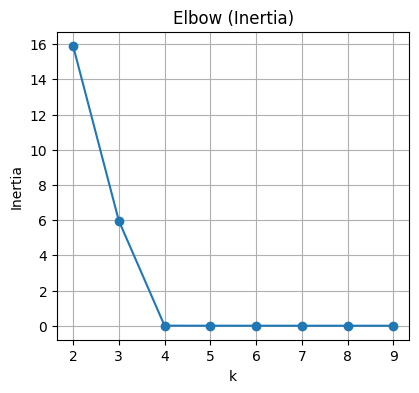

In [65]:
# Plot elbow and silhouette
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(k_values, inertia_list, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)

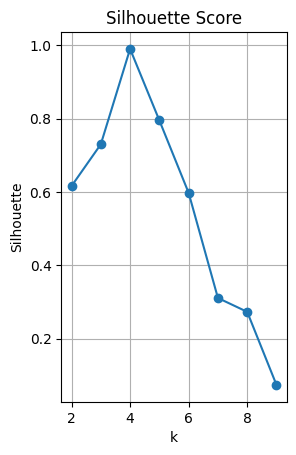

In [66]:
plt.subplot(1,2,2)
plt.plot(k_values, silhouette_list, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)

In [67]:
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "elbow_silhouette2.png"))
plt.close()

In [68]:
# Choose optimal k automatically: prefer highest silhouette, fallback to elbow heuristic
#  - pick k with max silhouette (ignoring NaNs). If multiple, pick smallest k among them.
valid_silhouette = elbow_df.dropna(subset=['silhouette'])
if not valid_silhouette.empty:
    best_k = int(valid_silhouette.loc[valid_silhouette['silhouette'].idxmax(), 'k'])
else:
    # fallback: elbow heuristic - pick k where percentage drop in inertia slows
    # simple heuristic: choose k at which inertia relative drop is less than threshold
    rel_drops = np.diff(inertia_list) / inertia_list[:-1]
    candidate = np.argwhere(rel_drops > -0.5)  # keep as fallback
    best_k = k_values[0] if len(candidate)==0 else k_values[min(len(rel_drops)-1, int(candidate[0]))]
best_k = max(2, min(best_k, max_k))


In [69]:
# ---------------------------
# 6) FIT FINAL KMEANS
# ---------------------------
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=50)
agg['cluster'] = kmeans_final.fit_predict(X_scaled)

# Save cluster centers (inverse transform to original scale for interpretability)
centers_scaled = kmeans_final.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=feature_cols)
centers_df['cluster'] = range(best_k)
centers_df.to_csv(os.path.join(OUTPUT_DIR, "cluster_centers2.csv"), index=False)

In [94]:
agg

,blr_name,total_txn_count,unique_customers,total_txn_amount,avg_txn_value,total_fee,avg_fee,success_rate,fee_percent,cluster,cluster_label,pca1,pca2
0,BILLER_01,39896,9974,1.178702e+07,295.443553,47159.88,1.182070,0.0,0.400100,0,High-Volume - Low-Value,0.018346,0.812548
1,BILLER_02,49555,9911,6.689448e+07,1349.903732,59774.30,1.206221,0.0,0.089356,1,High-Volume - High-Value,3.020046,0.377329
2,BILLER_03,9886,9886,1.480154e+06,149.722263,11811.51,1.194771,0.0,0.797992,2,Low-Volume - Low-Value,-1.764696,0.152913
3,BILLER_04,39936,9984,1.189807e+07,297.928385,47508.36,1.189612,0.0,0.399295,0,High-Volume - Low-Value,0.025585,0.811931
4,BILLER_05,9975,9975,1.543880e+06,154.774948,12370.56,1.240156,0.0,0.801264,2,Low-Volume - Low-Value,-1.761139,0.157064
5,BILLER_06,10054,10054,1.515515e+06,150.737500,12109.36,1.204432,0.0,0.799026,2,Low-Volume - Low-Value,-1.760251,0.160711
6,BILLER_07,50520,10104,6.839540e+07,1353.828227,60826.15,1.204001,0.0,0.088933,1,High-Volume - High-Value,3.081303,0.428958
7,BILLER_08,9925,9925,1.477551e+06,148.871612,11815.22,1.190450,0.0,0.799649,2,Low-Volume - Low-Value,-1.767303,0.157599
8,BILLER_09,10031,10031,1.050639e+07,1047.392146,11976.53,1.193952,0.0,0.113993,3,Low-Volume - High-Value,0.460534,-1.539315
9,BILLER_10,10156,10156,1.049824e+07,1033.698182,12089.55,1.190385,0.0,0.115158,3,Low-Volume - High-Value,0.447575,-1.519739


In [70]:
# ---------------------------
# 7) PROFILE CLUSTERS (DESCRIPTIVE)
# ---------------------------
profile = (
    agg.groupby('cluster')
    .agg(
        biller_count=('blr_name', 'count'),
        total_txn_count=('total_txn_count', 'sum'),
        total_txn_amount=('total_txn_amount', 'sum'),
        avg_txn_value=('avg_txn_value', 'mean'),
        avg_fee_percent=('fee_percent', 'mean'),
        unique_customers=('unique_customers', 'sum'),
    )
    .reset_index()
)
profile['txn_count_pct'] = profile['total_txn_count'] / profile['total_txn_count'].sum() * 100
profile['txn_amount_pct'] = profile['total_txn_amount'] / profile['total_txn_amount'].sum() * 100
profile.to_csv(os.path.join(OUTPUT_DIR, "cluster_profile2.csv"), index=False)
agg.to_csv(os.path.join(OUTPUT_DIR, "biller_segmentation_clusters2.csv"), index=False)

In [71]:
# ---------------------------
# 8) AUTO-LABEL CLUSTERS (HIGH-LEVEL NAMES)
# ---------------------------
# Use centers to decide labels like "High-Volume-Low-Value" etc.
def name_cluster(center_row):
    vol = center_row['total_txn_count_center']
    avg = center_row['avg_txn_value']

    vol_low = centers_df_for_naming['total_txn_count_center'].quantile(0.4)
    vol_high = centers_df_for_naming['total_txn_count_center'].quantile(0.6)
    avg_low = centers_df_for_naming['avg_txn_value'].quantile(0.4)
    avg_high = centers_df_for_naming['avg_txn_value'].quantile(0.6)

    if avg > avg_high and vol < vol_low:
        return "Low-Volume - High-Value"
    elif vol > vol_high and avg < avg_low:
        return "High-Volume - Low-Value"
    elif vol > vol_high and avg > avg_high:
        return "High-Volume - High-Value"
    elif vol < vol_low and avg < avg_low:
        return "Low-Volume - Low-Value"
    else:
        return "Moderate-Volume-Value"

centers_df_for_naming = centers_df.merge(
    profile[['cluster', 'total_txn_count', 'total_txn_amount']],
    on='cluster',
    how='left',
    suffixes=('_center', '_profile')
)
print("columns after merge:\n",centers_df_for_naming.columns )


columns after merge:
 Index(['total_txn_count_center', 'total_txn_amount_center', 'avg_txn_value',
       'fee_percent', 'cluster', 'total_txn_count_profile',
       'total_txn_amount_profile'],
      dtype='object')


In [72]:
centers_df_for_naming['label'] = centers_df_for_naming.apply(name_cluster, axis=1)
label_map = dict(zip(centers_df_for_naming['cluster'], centers_df_for_naming['label']))
agg['cluster_label'] = agg['cluster'].map(label_map)

# Save final results and label mapping
agg.to_csv(os.path.join(OUTPUT_DIR, "biller_segmentation_with_labels2.csv"), index=False)
pd.DataFrame.from_dict(label_map, orient='index', columns=['label']).to_csv(
    os.path.join(OUTPUT_DIR, "cluster_label_map2.csv")
)


In [73]:
print(profile.columns)

Index(['cluster', 'biller_count', 'total_txn_count', 'total_txn_amount',
       'avg_txn_value', 'avg_fee_percent', 'unique_customers', 'txn_count_pct',
       'txn_amount_pct'],
      dtype='object')


In [74]:
print(centers_df_for_naming.head())

   total_txn_count_center  total_txn_amount_center  avg_txn_value  \
0                 39916.0             1.184254e+07     296.685969   
1                 50037.5             6.764494e+07    1351.865979   
2                  9960.0             1.504275e+06     151.026580   
3                 10093.5             1.050231e+07    1040.545164   

   fee_percent  cluster  total_txn_count_profile  total_txn_amount_profile  \
0     0.399697        0                    79832              2.368508e+07   
1     0.089145        1                   100075              1.352899e+08   
2     0.799483        2                    39840              6.017100e+06   
3     0.114575        3                    20187              2.100463e+07   

                      label  
0   High-Volume - Low-Value  
1  High-Volume - High-Value  
2    Low-Volume - Low-Value  
3   Low-Volume - High-Value  


In [75]:
print(centers_df.columns)

Index(['total_txn_count', 'total_txn_amount', 'avg_txn_value', 'fee_percent',
       'cluster'],
      dtype='object')


In [76]:
centers_df_for_naming

,total_txn_count_center,total_txn_amount_center,avg_txn_value,fee_percent,cluster,total_txn_count_profile,total_txn_amount_profile,label
0,39916.0,1.184254e+07,296.685969,0.399697,0,79832,2.368508e+07,High-Volume - Low-Value
1,50037.5,6.764494e+07,1351.865979,0.089145,1,100075,1.352899e+08,High-Volume - High-Value
2,9960.0,1.504275e+06,151.026580,0.799483,2,39840,6.017100e+06,Low-Volume - Low-Value
3,10093.5,1.050231e+07,1040.545164,0.114575,3,20187,2.100463e+07,Low-Volume - High-Value


In [77]:
print("Volume median:", centers_df_for_naming['total_txn_count_center'].median())
print("Avg value median:", centers_df_for_naming['avg_txn_value'].median())
print(centers_df_for_naming[['cluster', 'total_txn_count_center', 'avg_txn_value']])

Volume median: 25004.75
Avg value median: 668.6155664982332
   cluster  total_txn_count_center  avg_txn_value
0        0                 39916.0     296.685969
1        1                 50037.5    1351.865979
2        2                  9960.0     151.026580
3        3                 10093.5    1040.545164


In [78]:
print(centers_df_for_naming[['cluster',
    'total_txn_count_center',
    'total_txn_amount_center',
    'avg_txn_value',
    'fee_percent']])

   cluster  total_txn_count_center  total_txn_amount_center  avg_txn_value  \
0        0                 39916.0             1.184254e+07     296.685969   
1        1                 50037.5             6.764494e+07    1351.865979   
2        2                  9960.0             1.504275e+06     151.026580   
3        3                 10093.5             1.050231e+07    1040.545164   

   fee_percent  
0     0.399697  
1     0.089145  
2     0.799483  
3     0.114575  


In [111]:
agg

,blr_name,total_txn_count,unique_customers,total_txn_amount,avg_txn_value,total_fee,avg_fee,success_rate,fee_percent,cluster,cluster_label,pca1,pca2
0,BILLER_01,39896,9974,1.178702e+07,295.443553,47159.88,1.182070,0.0,0.400100,0,High-Volume - Low-Value,0.018346,0.812548
1,BILLER_02,49555,9911,6.689448e+07,1349.903732,59774.30,1.206221,0.0,0.089356,1,High-Volume - High-Value,3.020046,0.377329
2,BILLER_03,9886,9886,1.480154e+06,149.722263,11811.51,1.194771,0.0,0.797992,2,Low-Volume - Low-Value,-1.764696,0.152913
3,BILLER_04,39936,9984,1.189807e+07,297.928385,47508.36,1.189612,0.0,0.399295,0,High-Volume - Low-Value,0.025585,0.811931
4,BILLER_05,9975,9975,1.543880e+06,154.774948,12370.56,1.240156,0.0,0.801264,2,Low-Volume - Low-Value,-1.761139,0.157064
5,BILLER_06,10054,10054,1.515515e+06,150.737500,12109.36,1.204432,0.0,0.799026,2,Low-Volume - Low-Value,-1.760251,0.160711
6,BILLER_07,50520,10104,6.839540e+07,1353.828227,60826.15,1.204001,0.0,0.088933,1,High-Volume - High-Value,3.081303,0.428958
7,BILLER_08,9925,9925,1.477551e+06,148.871612,11815.22,1.190450,0.0,0.799649,2,Low-Volume - Low-Value,-1.767303,0.157599
8,BILLER_09,10031,10031,1.050639e+07,1047.392146,11976.53,1.193952,0.0,0.113993,3,Low-Volume - High-Value,0.460534,-1.539315
9,BILLER_10,10156,10156,1.049824e+07,1033.698182,12089.55,1.190385,0.0,0.115158,3,Low-Volume - High-Value,0.447575,-1.519739


In [102]:
print(agg[['total_txn_count', 'total_txn_amount']].describe())

       total_txn_count  total_txn_amount
count        10.000000      1.000000e+01
mean      23993.400000      1.859967e+07
std       18373.587203      2.625405e+07
min        9886.000000      1.477551e+06
25%        9989.000000      1.522606e+06
50%       10105.000000      1.050231e+07
75%       39926.000000      1.187030e+07
max       50520.000000      6.839540e+07


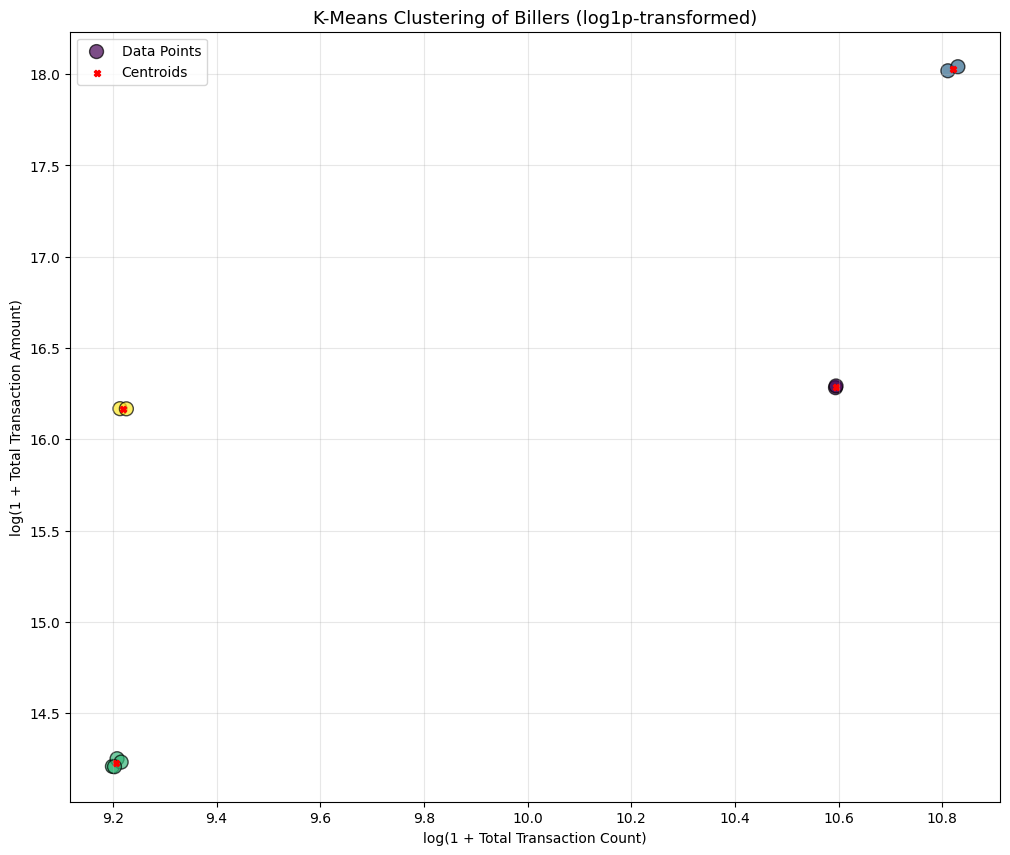

In [113]:
plt.figure(figsize=(12,10))

# Transform both axes
x = np.log1p(agg['total_txn_count'])
y = np.log1p(agg['total_txn_amount'])

plt.scatter(x, y, c=agg['cluster'], cmap='viridis', s=100, alpha=0.7, edgecolor='k', label='Data Points')
plt.scatter(np.log1p(centers[:, 0]), np.log1p(centers[:, 1]),
            c='red', s=20, marker='X', label='Centroids')

plt.title('K-Means Clustering of Billers (log1p-transformed)', fontsize=13)
plt.xlabel('log(1 + Total Transaction Count)')
plt.ylabel('log(1 + Total Transaction Amount)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()